# Spectroscopy with XGA

This tutorial will show you how to perform basic photometric analyses on XGA sources, starting with how to generate spectra for a source using the SAS interface. Once I have demonstrated how to generate the spectra for a source, I will show how we can use the XSPEC interface to fit a model to the data, and then how we can retrieve the fit results.

I will also demonstrate the use of the spectrum product view method, to produce visualisations of spectra roughly equivalent to those that XSPEC produces. 

In [37]:
from astropy.units import Quantity
import numpy as np
import pandas as pd

from xga.samples import ClusterSample
from xga.sources import PointSource
from xga.sas import evselect_spectrum
from xga.xspec import single_temp_apec, power_law

I need to define some sources to help demonstrate, and I've chosen to define both a sample of galaxy clusters (to demonstrate fitting a standard absorbed plasma emission model), and a **point source don't know which type yet** to demonstrate the fitting of a redshift dependant absorbed power law). These are currently the only two models implemented in XGA.

Again I've chosen four clusters from the XCS-SDSS sample:

In [38]:
# Setting up the column names and numpy array that go into the Pandas dataframe
column_names = ['name', 'ra', 'dec', 'z', 'r500', 'r200', 'richness', 'richness_err']
cluster_data = np.array([['XCSSDSS-124', 0.80057775, -6.0918182, 0.251, 1220.11, 1777.06, 109.55, 4.49],
                         ['XCSSDSS-2789', 0.95553986, 2.068019, 0.11, 1039.14, 1519.79, 38.90, 2.83],
                         ['XCSSDSS-290', 2.7226392, 29.161021, 0.338, 935.58, 1359.37, 105.10, 5.99],
                         ['XCSSDSS-134', 4.9083898, 3.6098177, 0.273, 1157.04, 1684.15, 108.60, 4.79]])

# Possibly I'm overcomplicating this by making it into a dataframe, but it is an excellent data structure,
#  and one that is very commonly used in my own analyses.
sample_df = pd.DataFrame(data=cluster_data, columns=column_names)
sample_df[['ra', 'dec', 'z', 'r500', 'r200', 'richness', 'richness_err']] = \
    sample_df[['ra', 'dec', 'z', 'r500', 'r200', 'richness', 'richness_err']].astype(float)

# Defining the sample of four XCS-SDSS galaxy clusters
demo_smp = ClusterSample(sample_df["ra"].values, sample_df["dec"].values, sample_df["z"].values, 
                         sample_df["name"].values, r200=Quantity(sample_df["r200"].values, "kpc"),
                         r500=Quantity(sample_df["r500"].values, 'kpc'), richness=sample_df['richness'].values, 
                         richness_err=sample_df['richness_err'].values)

Setting up Galaxy Clusters:   0%|          | 0/4 [00:00<?, ?it/s]

Pre-generating necessary products


Setting up Galaxy Clusters:  25%|██▌       | 1/4 [00:03<00:10,  3.56s/it]/home/dt237/software/anaconda3/envs/XGA/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/dt237/software/anaconda3/envs/XGA/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
Setting up Galaxy Clusters: 100%|██████████| 4/4 [00:14<00:00,  3.62s/it]


Here I'm defining a point source object for a Quasar at z~0.9, this object has no particular interest or significance (at least not to me), but it will be used to demonstrate the fitting of a powerlaw by XSPEC:

In [27]:
demo_src = PointSource(182.2416, 45.67667, 0.9254, name='pg 1206+459')

Generating products of type(s) ccf: 100%|██████████| 1/1 [00:12<00:00, 12.01s/it]


## Generating Spectra for our sources

In [30]:
evselect_spectrum(demo_src, 'custom')

Generating products of type(s) spectrum: 100%|██████████| 3/3 [02:10<00:00, 43.62s/it] 


## Fitting models to our sources

In [31]:
power_law(demo_src, 'custom', redshifted=True)

Running XSPEC Fits: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


## Viewing fitted spectra

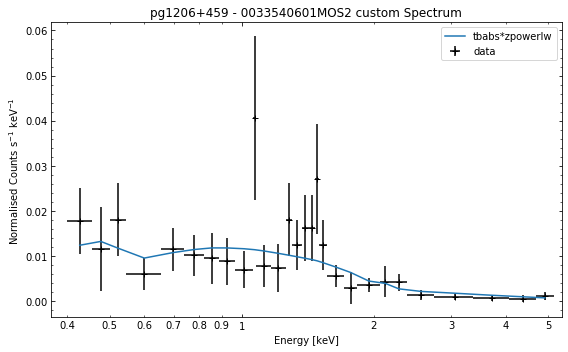

In [34]:
demo_src.get_products('spectrum')[2].view()

## Retrieving fit parameters 